# Experimento

## Prepaaración

In [88]:
from cdsgd import DSClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [89]:
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    k = len(unique_labels)
    
    # Calcular el diámetro de cada clúster
    diameters = []
    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            diameters.append(np.max(cdist(cluster_points, cluster_points, metric='euclidean')))
        else:
            diameters.append(0)
    
    max_diameter = np.max(diameters)
    
    # Calcular la distancia mínima entre clusters
    min_distances = []
    for i in range(k):
        for j in range(i + 1, k):
            cluster_i_points = X[labels == unique_labels[i]]
            cluster_j_points = X[labels == unique_labels[j]]
            min_distance = np.min(cdist(cluster_i_points, cluster_j_points, metric='euclidean'))
            min_distances.append(min_distance)
    
    min_intercluster_distance = np.min(min_distances)
    
    # Índice de Dunn
    dunn_index_value = min_intercluster_distance / max_diameter
    
    return dunn_index_value

## Dataa sintetica

### 01) Dataset

In [90]:
dataset = pd.read_csv('data/datos.csv')
print("Shape:", dataset.shape)

Shape: (1000, 2)


In [91]:
dsc = DSClustering(cluster=2, data=dataset)
dsc.generate_categorical_rules()
y_pred_dsc = dsc.predict()
print("DSC Dunn index:", dunn_index(dataset.values, y_pred_dsc))
print("DSC Silhouette score:", silhouette_score(dataset.values, y_pred_dsc))

Optimization started
Processing epoch	373	0.0007	
Training time: 41.51s, epochs: 400

Least training loss reached: 0.001
DSC Dunn index: 0.09774957954177799
DSC Silhouette score: 0.6284511766817903


In [92]:
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred_kmeans = kmeans.fit_predict(dataset)
print("KMeans Dunn index:", dunn_index(dataset.values, y_pred_kmeans))
print("KMeans Silhouette score:", silhouette_score(dataset.values, y_pred_kmeans))

KMeans Dunn index: 0.09774957954177799
KMeans Silhouette score: 0.6284511766817903


In [93]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(dataset)
if len(np.unique(y_pred_dbscan)) != 1:
    print("DBSCAN Silhouette score:", silhouette_score(dataset.values, y_pred_dbscan))
    print("DBSCAN Dunn index:", dunn_index(dataset.values, y_pred_dbscan))

In [94]:

agg = AgglomerativeClustering(n_clusters=2)
y_pred_agg = agg.fit_predict(dataset)
print("Agglomerative Dunn index:", dunn_index(dataset.values, y_pred_agg))
print("Agglomerative Silhouette score:", silhouette_score(dataset.values, y_pred_agg))

Agglomerative Dunn index: 0.09774957954177799
Agglomerative Silhouette score: 0.6284511766817903


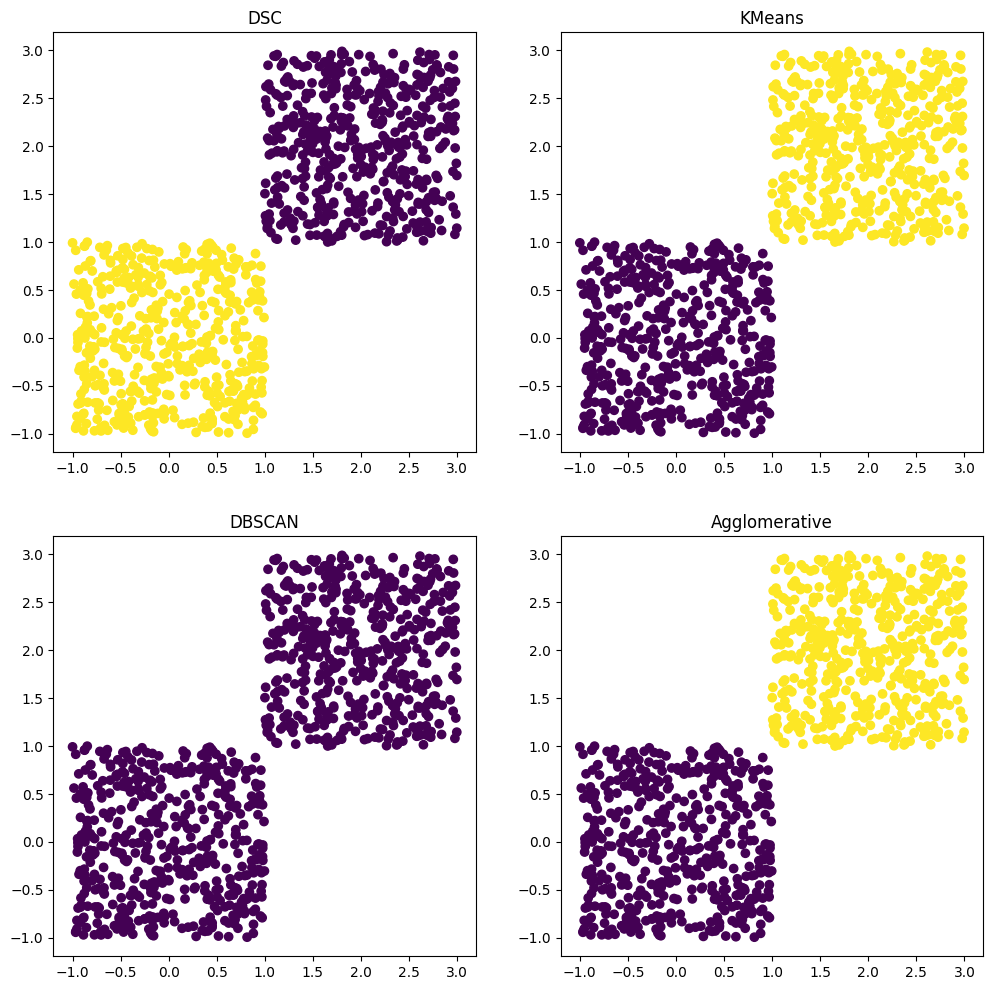

In [95]:
# Gráfica de los datos
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_dsc)
plt.title('DSC')
plt.subplot(2, 2, 2)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_kmeans)
plt.title('KMeans')
plt.subplot(2, 2, 3)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_dbscan)
plt.title('DBSCAN')
plt.subplot(2, 2, 4)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_agg)
plt.title('Agglomerative')
plt.show()


### 02) Dataset gausiano

In [96]:
dataset = pd.read_csv('data/datos_gaussianos.csv')
print("Shape:", dataset.shape)

Shape: (1000, 2)


In [97]:
dsc = DSClustering(cluster=2, data=dataset)
dsc.generate_categorical_rules()
y_pred_dsc = dsc.predict()
print("DSC Dunn index:", dunn_index(dataset.values, y_pred_dsc))
print("DSC Silhouette score:", silhouette_score(dataset.values, y_pred_dsc))

Optimization started
Processing epoch	373	0.0010	
Training time: 41.42s, epochs: 400

Least training loss reached: 0.001
DSC Dunn index: 0.060186292531403604
DSC Silhouette score: 0.693662371193828


In [98]:
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred_kmeans = kmeans.fit_predict(dataset)
print("KMeans Dunn index:", dunn_index(dataset.values, y_pred_kmeans))
print("KMeans Silhouette score:", silhouette_score(dataset.values, y_pred_kmeans))

KMeans Dunn index: 0.060186292531403604
KMeans Silhouette score: 0.693662371193828


In [99]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(dataset)
if len(np.unique(y_pred_dbscan)) != 1:
    print("DBSCAN Silhouette score:", silhouette_score(dataset.values, y_pred_dbscan))
    print("DBSCAN Dunn index:", dunn_index(dataset.values, y_pred_dbscan))

DBSCAN Silhouette score: 0.11943430495773771
DBSCAN Dunn index: 0.023938069313922963


In [100]:

agg = AgglomerativeClustering(n_clusters=2)
y_pred_agg = agg.fit_predict(dataset)
print("Agglomerative Dunn index:", dunn_index(dataset.values, y_pred_agg))
print("Agglomerative Silhouette score:", silhouette_score(dataset.values, y_pred_agg))

Agglomerative Dunn index: 0.06942421442736177
Agglomerative Silhouette score: 0.6925874892974465


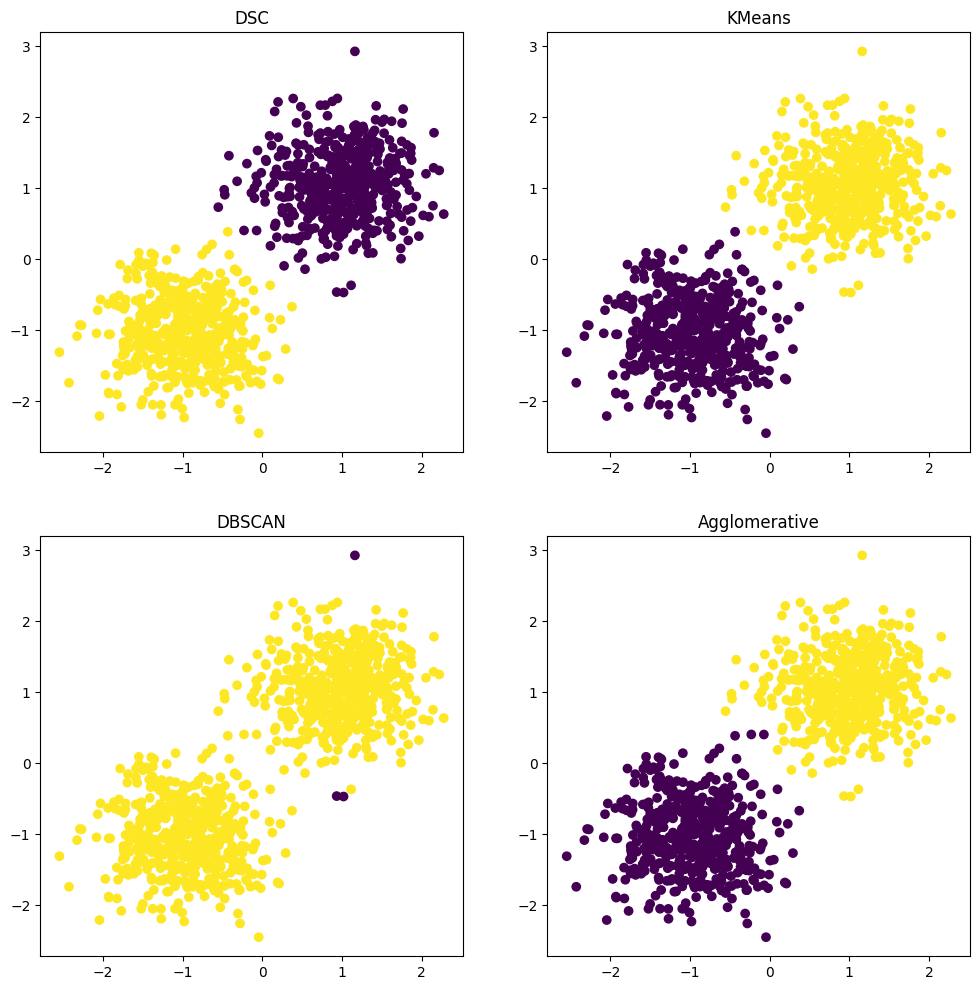

In [101]:
# Gráfica de los datos
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_dsc)
plt.title('DSC')
plt.subplot(2, 2, 2)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_kmeans)
plt.title('KMeans')
plt.subplot(2, 2, 3)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_dbscan)
plt.title('DBSCAN')
plt.subplot(2, 2, 4)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_agg)
plt.title('Agglomerative')
plt.show()


### 03) Dataset anillos

In [102]:
dataset = pd.read_csv('data/datos_anillo.csv')
print("Shape:", dataset.shape)

Shape: (1000, 3)


In [103]:
dsc = DSClustering(cluster=2, data=dataset)
dsc.generate_categorical_rules()
y_pred_dsc = dsc.predict()
print("DSC Dunn index:", dunn_index(dataset.values, y_pred_dsc))
print("DSC Silhouette score:", silhouette_score(dataset.values, y_pred_dsc))

Optimization started
Processing epoch	373	0.0036	
Training time: 43.19s, epochs: 400

Least training loss reached: 0.003
DSC Dunn index: 0.010352414639172566
DSC Silhouette score: 0.34181917371279913


In [104]:
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred_kmeans = kmeans.fit_predict(dataset)
print("KMeans Dunn index:", dunn_index(dataset.values, y_pred_kmeans))
print("KMeans Silhouette score:", silhouette_score(dataset.values, y_pred_kmeans))

KMeans Dunn index: 0.024862013757633954
KMeans Silhouette score: 0.34129398248523557


In [105]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(dataset)
if len(np.unique(y_pred_dbscan)) != 1:
    print("DBSCAN Dunn index:", dunn_index(dataset.values, y_pred_dbscan))
    print("DBSCAN Silhouette score:", silhouette_score(dataset.values, y_pred_dbscan))

DBSCAN Dunn index: 0.45098317756898226
DBSCAN Silhouette score: 0.17490927861391276


In [106]:

agg = AgglomerativeClustering(n_clusters=2)
y_pred_agg = agg.fit_predict(dataset)
print("Agglomerative Dunn index:", dunn_index(dataset.values, y_pred_agg))
print("Agglomerative Silhouette score:", silhouette_score(dataset.values, y_pred_agg))

Agglomerative Dunn index: 0.028028761554136052
Agglomerative Silhouette score: 0.296250759520065


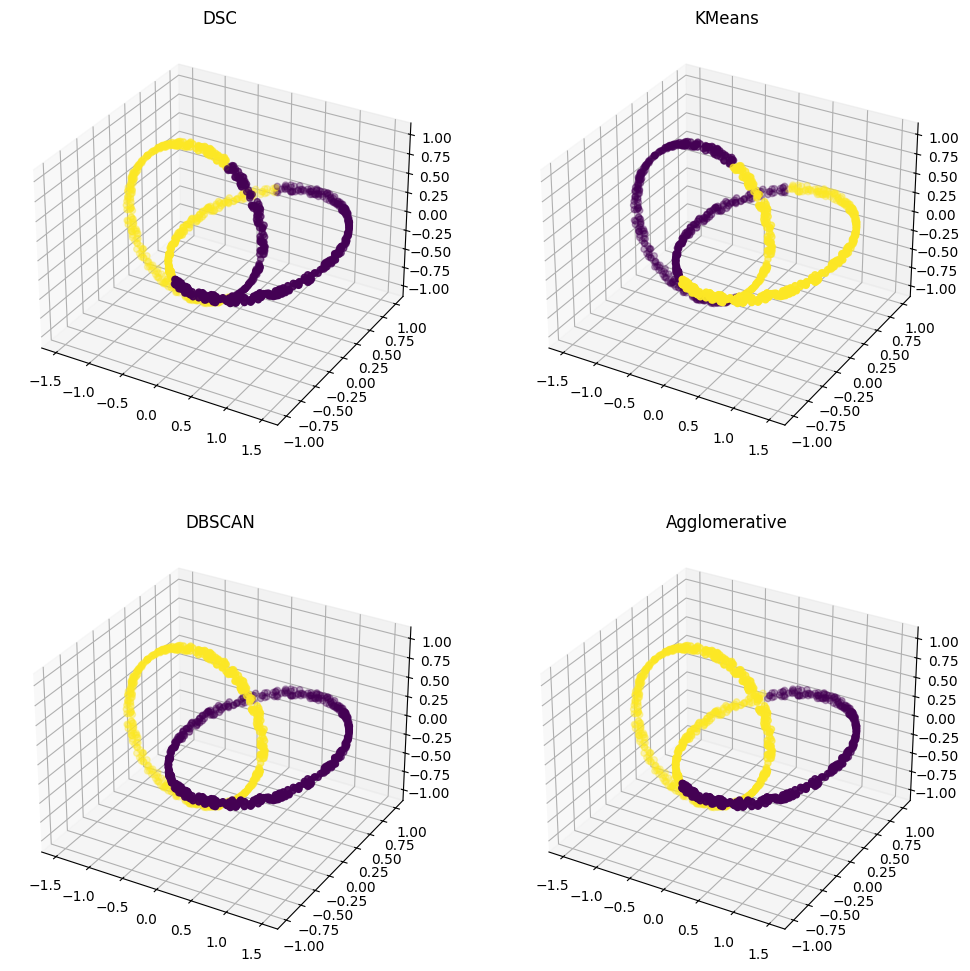

In [107]:
# Gráfica de los datos
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=y_pred_dsc)
plt.title('DSC')
ax = fig.add_subplot(222, projection='3d')
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=y_pred_kmeans)
plt.title('KMeans')
ax = fig.add_subplot(223, projection='3d')
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=y_pred_dbscan)
plt.title('DBSCAN')
ax = fig.add_subplot(224, projection='3d')
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=y_pred_agg)
plt.title('Agglomerative')

plt.show()



### 04) Dataset anillos concentricos

In [108]:
dataset = pd.read_csv("data/datos_anillo_concentrico.csv")
print("Shape:", dataset.shape)

Shape: (999, 2)


In [109]:
dsc = DSClustering(cluster=3, data=dataset)
dsc.generate_categorical_rules()
y_pred_dsc = dsc.predict()
print("DSC Dunn index:", dunn_index(dataset.values, y_pred_dsc))
print("DSC Silhouette score:", silhouette_score(dataset.values, y_pred_dsc))

Optimization started
Processing epoch	373	0.0018	
Training time: 41.60s, epochs: 400

Least training loss reached: 0.002
DSC Dunn index: 0.0016834917201976089
DSC Silhouette score: 0.3516995168428833


In [110]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_pred_kmeans = kmeans.fit_predict(dataset)
print("KMeans Dunn index:", dunn_index(dataset.values, y_pred_kmeans))
print("KMeans Silhouette score:", silhouette_score(dataset.values, y_pred_kmeans))

KMeans Dunn index: 0.00731985410909022
KMeans Silhouette score: 0.35240271190820915


In [111]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(dataset)
if len(np.unique(y_pred_dbscan)) != 1:
    print("DBSCAN Silhouette score:", silhouette_score(dataset.values, y_pred_dbscan))
    print("DBSCAN Dunn index:", dunn_index(dataset.values, y_pred_dbscan))

In [112]:

agg = AgglomerativeClustering(n_clusters=3)
y_pred_agg = agg.fit_predict(dataset)
print("Agglomerative Dunn index:", dunn_index(dataset.values, y_pred_agg))
print("Agglomerative Silhouette score:", silhouette_score(dataset.values, y_pred_agg))

Agglomerative Dunn index: 0.01480080072697122
Agglomerative Silhouette score: 0.30226033911363376


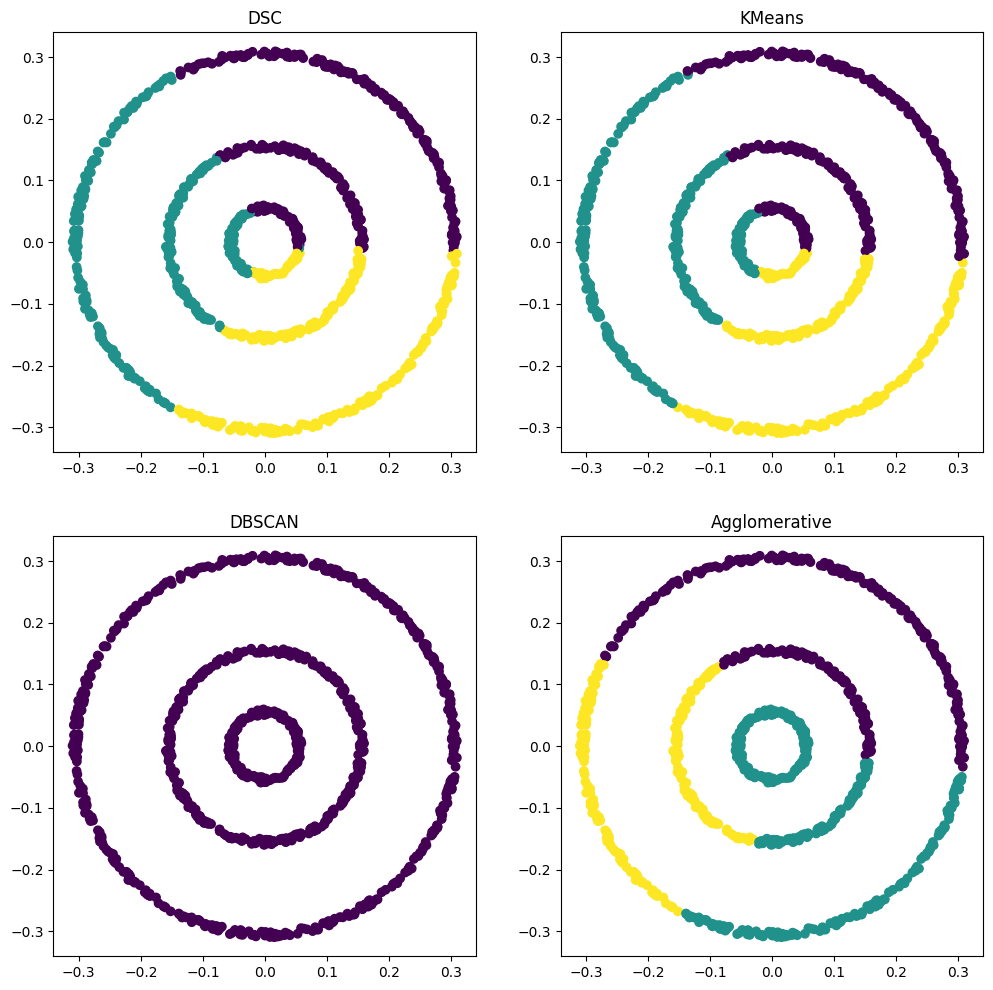

In [113]:
# Gráfica de los datos
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_dsc)
plt.title('DSC')
plt.subplot(2, 2, 2)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_kmeans)
plt.title('KMeans')
plt.subplot(2, 2, 3)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_dbscan)
plt.title('DBSCAN')
plt.subplot(2, 2, 4)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_agg)
plt.title('Agglomerative')
plt.show()


### 05) Dataset planos

In [114]:
dataset = pd.read_csv('data/datos_planos.csv')
print("Shape:", dataset.shape)

Shape: (500, 3)


In [115]:
dsc = DSClustering(cluster=2, data=dataset)
dsc.generate_categorical_rules()
y_pred_dsc = dsc.predict()
print("DSC Dunn index:", dunn_index(dataset.values, y_pred_dsc))
print("DSC Silhouette score:", silhouette_score(dataset.values, y_pred_dsc))

Optimization started
Processing epoch	373	0.0015	
Training time: 21.42s, epochs: 400

Least training loss reached: 0.001
DSC Dunn index: 0.6583884252642181
DSC Silhouette score: 0.5408397493917175


In [116]:
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred_kmeans = kmeans.fit_predict(dataset)
print("KMeans Dunn index:", dunn_index(dataset.values, y_pred_kmeans))
print("KMeans Silhouette score:", silhouette_score(dataset.values, y_pred_kmeans))

KMeans Dunn index: 0.6583884252642181
KMeans Silhouette score: 0.5408397493917175


In [117]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(dataset)
if len(np.unique(y_pred_dbscan)) != 1:
    print("DBSCAN Silhouette score:", silhouette_score(dataset.values, y_pred_dbscan))
    print("DBSCAN Dunn index:", dunn_index(dataset.values, y_pred_dbscan))

DBSCAN Silhouette score: 0.5408397493917175
DBSCAN Dunn index: 0.6583884252642181


In [118]:

agg = AgglomerativeClustering(n_clusters=2)
y_pred_agg = agg.fit_predict(dataset)
print("Agglomerative Dunn index:", dunn_index(dataset.values, y_pred_agg))
print("Agglomerative Silhouette score:", silhouette_score(dataset.values, y_pred_agg))

Agglomerative Dunn index: 0.6583884252642181
Agglomerative Silhouette score: 0.5408397493917175


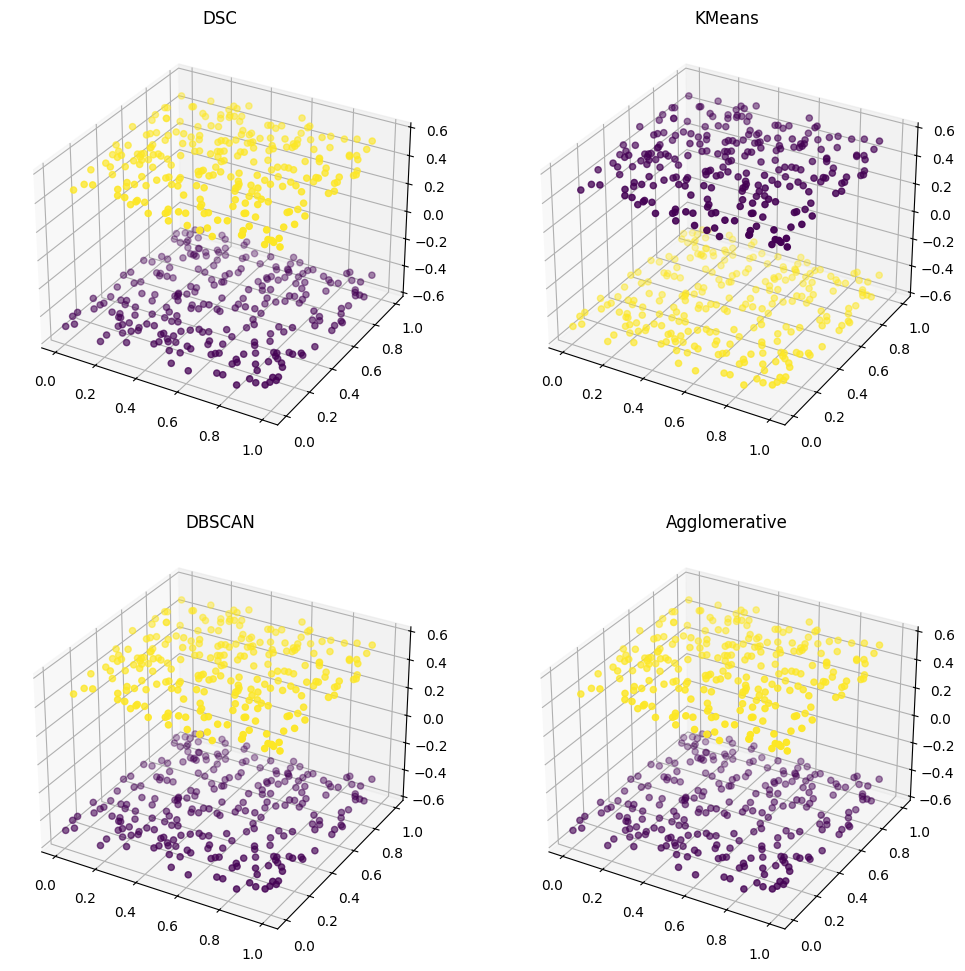

In [119]:
# Gráfica de los datos
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=y_pred_dsc)
plt.title('DSC')
ax = fig.add_subplot(222, projection='3d')
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=y_pred_kmeans)
plt.title('KMeans')
ax = fig.add_subplot(223, projection='3d')
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=y_pred_dbscan)
plt.title('DBSCAN')
ax = fig.add_subplot(224, projection='3d')
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=y_pred_agg)
plt.title('Agglomerative')
plt.show()


### 06) Dataset 3 grupos

In [120]:
dataset = pd.read_csv('data/datos_3grupos.csv')
print("Shape:", dataset.shape)

Shape: (1000, 2)


In [121]:
dsc = DSClustering(cluster=3, data=dataset)
dsc.generate_categorical_rules()
y_pred_dsc = dsc.predict()
print("DSC Dunn index:", dunn_index(dataset.values, y_pred_dsc))
print("DSC Silhouette score:", silhouette_score(dataset.values, y_pred_dsc))

Optimization started
Processing epoch	373	0.0013	
Training time: 42.27s, epochs: 400

Least training loss reached: 0.001
DSC Dunn index: 0.16885102954076509
DSC Silhouette score: 0.6095901846260401


In [122]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_pred_kmeans = kmeans.fit_predict(dataset)
print("KMeans Dunn index:", dunn_index(dataset.values, y_pred_kmeans))
print("KMeans Silhouette score:", silhouette_score(dataset.values, y_pred_kmeans))

KMeans Dunn index: 0.026452178783591386
KMeans Silhouette score: 0.606775915817648


In [123]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(dataset)
if len(np.unique(y_pred_dbscan)) != 1:
    print("DBSCAN Silhouette score:", silhouette_score(dataset.values, y_pred_dbscan))
    print("DBSCAN Dunn index:", dunn_index(dataset.values, y_pred_dbscan))

In [124]:

agg = AgglomerativeClustering(n_clusters=3)
y_pred_agg = agg.fit_predict(dataset)
print("Agglomerative Dunn index:", dunn_index(dataset.values, y_pred_agg))
print("Agglomerative Silhouette score:", silhouette_score(dataset.values, y_pred_agg))

Agglomerative Dunn index: 0.16885102954076509
Agglomerative Silhouette score: 0.6095901846260401


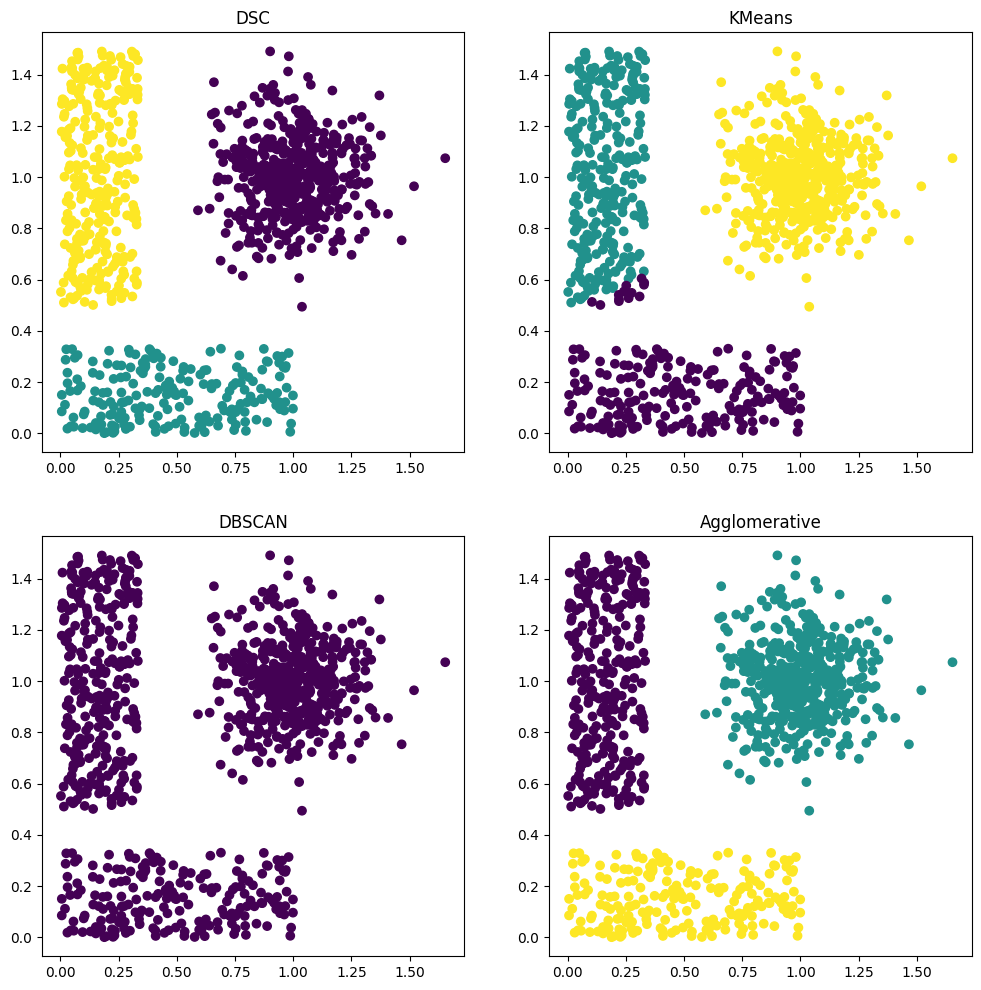

In [125]:
# Gráfica de los datos
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_dsc)
plt.title('DSC')
plt.subplot(2, 2, 2)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_kmeans)
plt.title('KMeans')
plt.subplot(2, 2, 3)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_dbscan)
plt.title('DBSCAN')
plt.subplot(2, 2, 4)
plt.scatter(dataset['x'], dataset['y'], c=y_pred_agg)
plt.title('Agglomerative')
plt.show()


### 07) Dataset piramide

In [126]:
dataset = pd.read_csv('data/datos_piramide.csv')
print("Shape:", dataset.shape)

Shape: (400, 3)


In [127]:
dsc = DSClustering(cluster=4, data=dataset)
dsc.generate_categorical_rules()
y_pred_dsc = dsc.predict()
print("DSC Dunn index:", dunn_index(dataset.values, y_pred_dsc))
print("DSC Silhouette score:", silhouette_score(dataset.values, y_pred_dsc))

Optimization started
Processing epoch	373	0.0001	
Training time: 18.51s, epochs: 400

Least training loss reached: 0.000
DSC Dunn index: 0.08964778637756994
DSC Silhouette score: 0.8384094255669907


In [128]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_pred_kmeans = kmeans.fit_predict(dataset)
print("KMeans Dunn index:", dunn_index(dataset.values, y_pred_kmeans))
print("KMeans Silhouette score:", silhouette_score(dataset.values, y_pred_kmeans))

KMeans Dunn index: 1.2496974532775864
KMeans Silhouette score: 0.8436620313036991


In [129]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(dataset)
if len(np.unique(y_pred_dbscan)) != 1:
    print("DBSCAN Silhouette score:", silhouette_score(dataset.values, y_pred_dbscan))
    print("DBSCAN Dunn index:", dunn_index(dataset.values, y_pred_dbscan))

DBSCAN Silhouette score: 0.8436620313036991
DBSCAN Dunn index: 1.2496974532775864


In [130]:

agg = AgglomerativeClustering(n_clusters=4)
y_pred_agg = agg.fit_predict(dataset)
print("Agglomerative Dunn index:", dunn_index(dataset.values, y_pred_agg))
print("Agglomerative Silhouette score:", silhouette_score(dataset.values, y_pred_agg))

Agglomerative Dunn index: 1.2496974532775864
Agglomerative Silhouette score: 0.8436620313036991


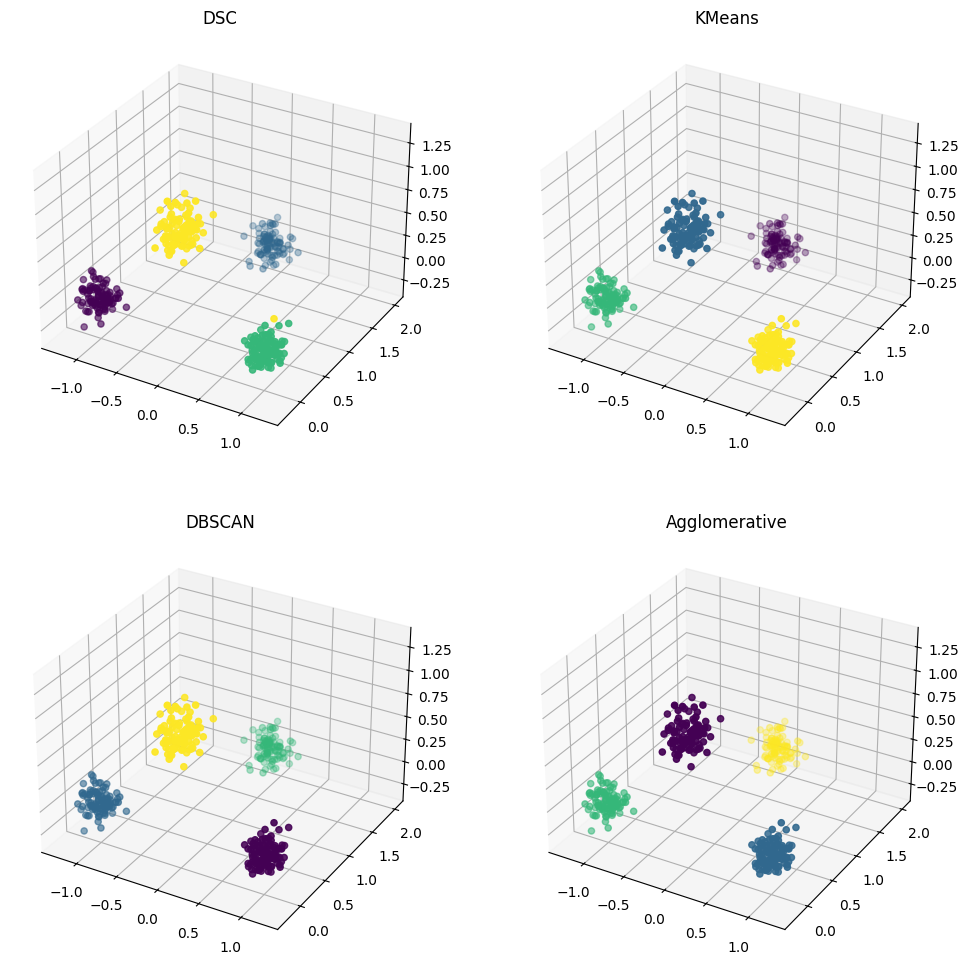

In [131]:
# Gráfica de los datos
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=y_pred_dsc)
plt.title('DSC')
ax = fig.add_subplot(222, projection='3d')
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=y_pred_kmeans)
plt.title('KMeans')
ax = fig.add_subplot(223, projection='3d')
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=y_pred_dbscan)
plt.title('DBSCAN')
ax = fig.add_subplot(224, projection='3d')
ax.scatter(dataset['x'], dataset['y'], dataset['z'], c=y_pred_agg)
plt.title('Agglomerative')
plt.show()



### 08) Dataset piramide con ruido

In [132]:
dataset = pd.read_csv('data/datos_piramide_con_ruido.csv')
print("Shape:", dataset.shape)

Shape: (400, 5)


In [133]:
dsc = DSClustering(cluster=4, data=dataset)
dsc.generate_categorical_rules()
y_pred_dsc = dsc.predict()
print("DSC Dunn index:", dunn_index(dataset.values, y_pred_dsc))
print("DSC Silhouette score:", silhouette_score(dataset.values, y_pred_dsc))

Optimization started
Processing epoch	373	0.0011	
Training time: 20.80s, epochs: 400

Least training loss reached: 0.001
DSC Dunn index: 0.043840312488919404
DSC Silhouette score: 0.26154443544893485


In [134]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_pred_kmeans = kmeans.fit_predict(dataset)
print("KMeans Dunn index:", dunn_index(dataset.values, y_pred_kmeans))
print("KMeans Silhouette score:", silhouette_score(dataset.values, y_pred_kmeans))

KMeans Dunn index: 0.052327633416263966
KMeans Silhouette score: 0.24426600409097218


In [135]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(dataset)
if len(np.unique(y_pred_dbscan)) != 1:
    print("DBSCAN Dunn index:", dunn_index(dataset.values, y_pred_dbscan))
    print("DBSCAN Silhouette score:", silhouette_score(dataset.values, y_pred_dbscan))

DBSCAN Dunn index: 0.022326447073946824
DBSCAN Silhouette score: 0.07802855264076729


In [136]:

agg = AgglomerativeClustering(n_clusters=4)
y_pred_agg = agg.fit_predict(dataset)
print("Agglomerative Dunn index:", dunn_index(dataset.values, y_pred_agg))
print("Agglomerative Silhouette score:", silhouette_score(dataset.values, y_pred_agg))

Agglomerative Dunn index: 0.05066235370365447
Agglomerative Silhouette score: 0.23882436868808377


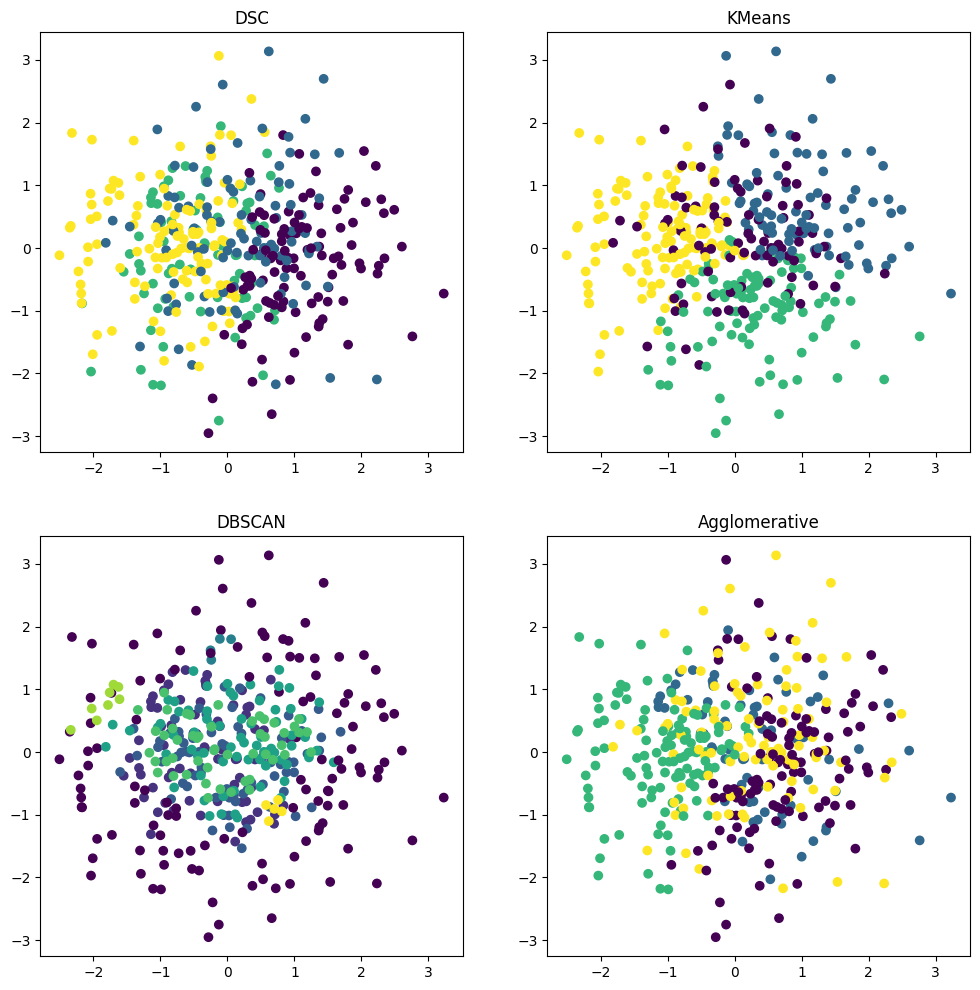

In [137]:
# Gráfica de los datos
pca = PCA(n_components=3)
X_pca = pca.fit_transform(dataset)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_pred_dsc)
plt.title('DSC')
ax = fig.add_subplot(222, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_pred_kmeans)
plt.title('KMeans')
ax = fig.add_subplot(223, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_pred_dbscan)
plt.title('DBSCAN')
ax = fig.add_subplot(224, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y_pred_agg)
plt.show()


### 09) Dataset piramide con features redundantes

In [138]:
dataset = pd.read_csv('data/datos_piramide_con_ruido_redundante.csv')
print("Shape:", dataset.shape)

Shape: (400, 5)


In [139]:
dsc = DSClustering(cluster=4, data=dataset)
dsc.generate_categorical_rules()
y_pred_dsc = dsc.predict()
print("DSC Dunn index:", dunn_index(dataset.values, y_pred_dsc))
print("DSC Silhouette score:", silhouette_score(dataset.values, y_pred_dsc))

Optimization started
Processing epoch	373	0.0001	
Training time: 20.84s, epochs: 400

Least training loss reached: 0.000
DSC Dunn index: 0.9635165560065716
DSC Silhouette score: 0.8319015654724679


In [140]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_pred_kmeans = kmeans.fit_predict(dataset)
print("KMeans Dunn index:", dunn_index(dataset.values, y_pred_kmeans))
print("KMeans Silhouette score:", silhouette_score(dataset.values, y_pred_kmeans))

KMeans Dunn index: 0.9635165560065716
KMeans Silhouette score: 0.8319015654724679


In [141]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_pred_dbscan = dbscan.fit_predict(dataset)
if len(np.unique(y_pred_dbscan)) != 1:
    print("DBSCAN Silhouette score:", silhouette_score(dataset.values, y_pred_dbscan))
    print("DBSCAN Dunn index:", dunn_index(dataset.values, y_pred_dbscan))

DBSCAN Silhouette score: 0.8319015654724679
DBSCAN Dunn index: 0.9635165560065716


In [142]:

agg = AgglomerativeClustering(n_clusters=4)
y_pred_agg = agg.fit_predict(dataset)
print("Agglomerative Dunn index:", dunn_index(dataset.values, y_pred_agg))
print("Agglomerative Silhouette score:", silhouette_score(dataset.values, y_pred_agg))

Agglomerative Dunn index: 0.9635165560065716
Agglomerative Silhouette score: 0.8319015654724679


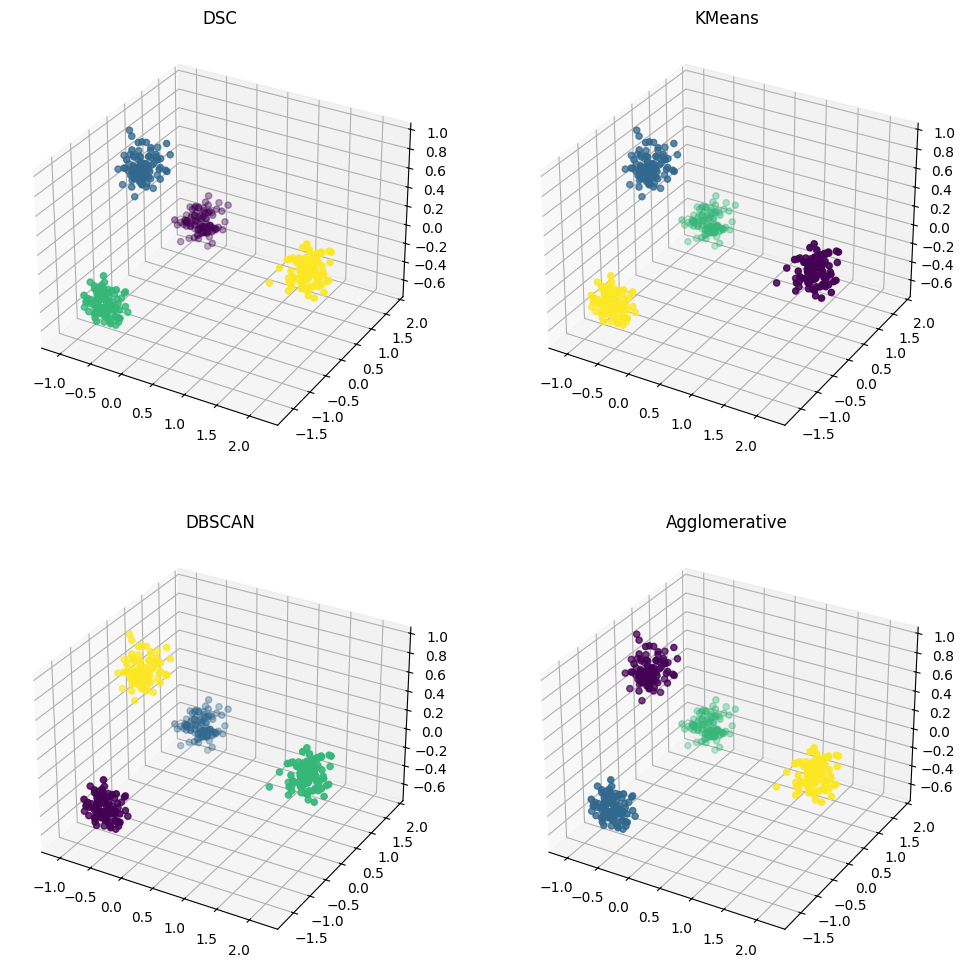

In [144]:
# Gráfica de los datos
pca = PCA(n_components=3)
dataset_pca = pca.fit_transform(dataset)
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(dataset_pca[:, 0], dataset_pca[:, 1], dataset_pca[:, 2], c=y_pred_dsc)
plt.title('DSC')
ax = fig.add_subplot(222, projection='3d')
ax.scatter(dataset_pca[:, 0], dataset_pca[:, 1], dataset_pca[:, 2], c=y_pred_kmeans)
plt.title('KMeans')
ax = fig.add_subplot(223, projection='3d')
ax.scatter(dataset_pca[:, 0], dataset_pca[:, 1], dataset_pca[:, 2], c=y_pred_dbscan)
plt.title('DBSCAN')
ax = fig.add_subplot(224, projection='3d')
ax.scatter(dataset_pca[:, 0], dataset_pca[:, 1], dataset_pca[:, 2], c=y_pred_agg)
plt.title('Agglomerative')
plt.show()